El conjunto de datos de Iris contiene 150 muestras de flores clasificadas en tres especies: setosa, versicolor y virginica. Cada muestra está descrita por cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Queremos usar PCA para reducir estas cuatro dimensiones a un espacio de menor dimensión y visualizar las relaciones entre las muestras.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Etiquetas de especie
species = iris.target_names  # Nombres de las especies
X

In [27]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [28]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [29]:
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()
explained_variance_cumulative

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

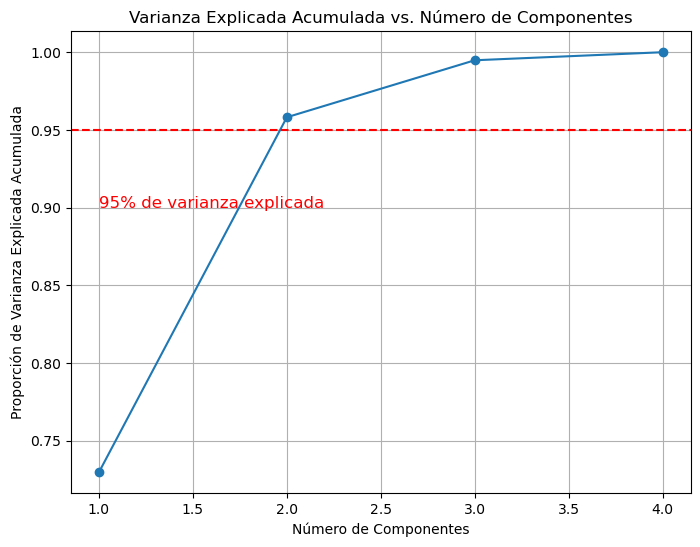

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--')  # Línea para 95% de varianza explicada
plt.text(1, 0.90, '95% de varianza explicada', color='red', fontsize=12)
plt.grid()
plt.show()

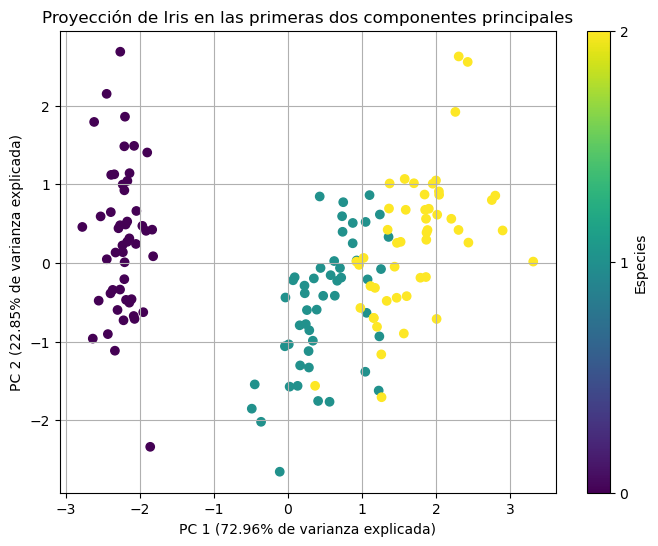

In [31]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Proyección de Iris en las primeras dos componentes principales')
plt.xlabel('PC 1 (%.2f%% de varianza explicada)' % (explained_variance[0] * 100))
plt.ylabel('PC 2 (%.2f%% de varianza explicada)' % (explained_variance[1] * 100))
plt.colorbar(scatter, ticks=[0, 1, 2], label='Especies')
plt.grid()
plt.show()

In [19]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

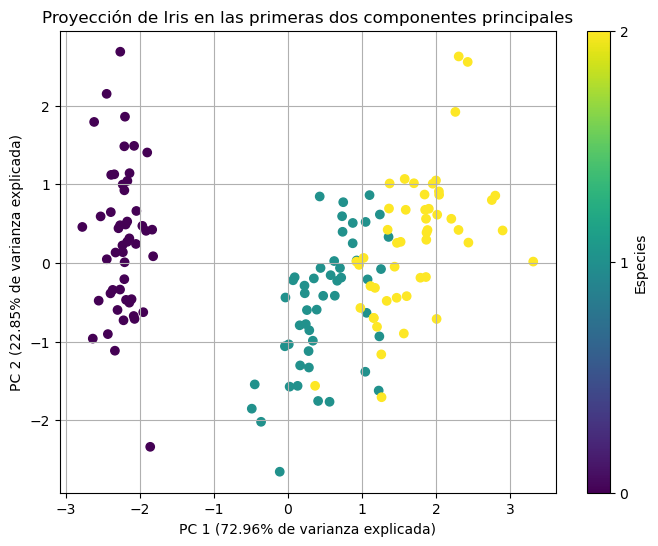

In [20]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Proyección de Iris en las primeras dos componentes principales')
plt.xlabel('PC 1 (%.2f%% de varianza explicada)' % (explained_variance[0] * 100))
plt.ylabel('PC 2 (%.2f%% de varianza explicada)' % (explained_variance[1] * 100))
plt.colorbar(scatter, ticks=[0, 1, 2], label='Especies')
plt.grid()
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = cancer_data.target

In [33]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [35]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_std)


fit(): Ajusta el modelo PCA a los datos estandarizados (X_std).
b) transform(): Aplica la transformación PCA a los datos.

In [36]:
explained_variance_ratio = pca_full.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:")
print(explained_variance_ratio)

Proporción de varianza explicada por cada componente:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [37]:
explained_variance_cumulative = np.cumsum(explained_variance_ratio)
print("\nProporción de varianza explicada acumulada por los componentes:")
print(explained_variance_cumulative)


Proporción de varianza explicada acumulada por los componentes:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


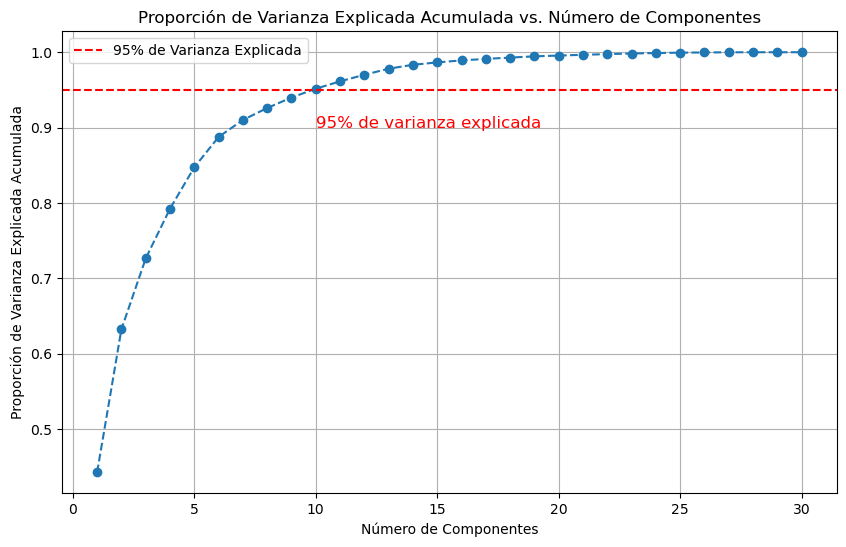

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Proporción de Varianza Explicada Acumulada vs. Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de Varianza Explicada')
plt.text(10, 0.90, '95% de varianza explicada', color='red', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [39]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

In [40]:
print(f"\nProporción de varianza explicada con {2} componentes:")
print(pca.explained_variance_ratio_)
print(f"Varianza total explicada por {2} componentes: {pca.explained_variance_ratio_.sum():.2f}")


Proporción de varianza explicada con 2 componentes:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Varianza total explicada por 2 componentes: 0.95


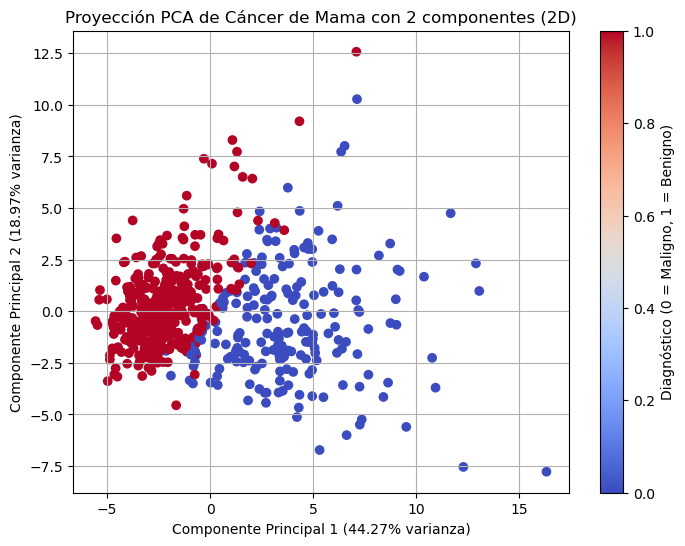

In [41]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title(f'Proyección PCA de Cáncer de Mama con {2} componentes (2D)')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% varianza)')
plt.colorbar(scatter, label='Diagnóstico (0 = Maligno, 1 = Benigno)')
plt.grid()
plt.show()

In [42]:
pca_columns = [f'PC{i+1}' for i in range(10)]  # Crear nombres de columnas para cada componente principal
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df['Diagnosis'] = y  # Agregar la etiqueta original como referencia

In [43]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159371,-0.398414,-0.157114,-0.877401,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013356,0.240998,-0.711907,1.106993,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668163,0.097361,0.024064,0.454265,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429917,1.059538,-1.405440,-1.117008,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636371,-0.263803,0.377699,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596129,-0.035473,0.987925,0.256984,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113355,-0.105211,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192760,0.341897,0.393914,0.520888,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567937,0.223086,-0.280258,-0.542031,-0.089299,0


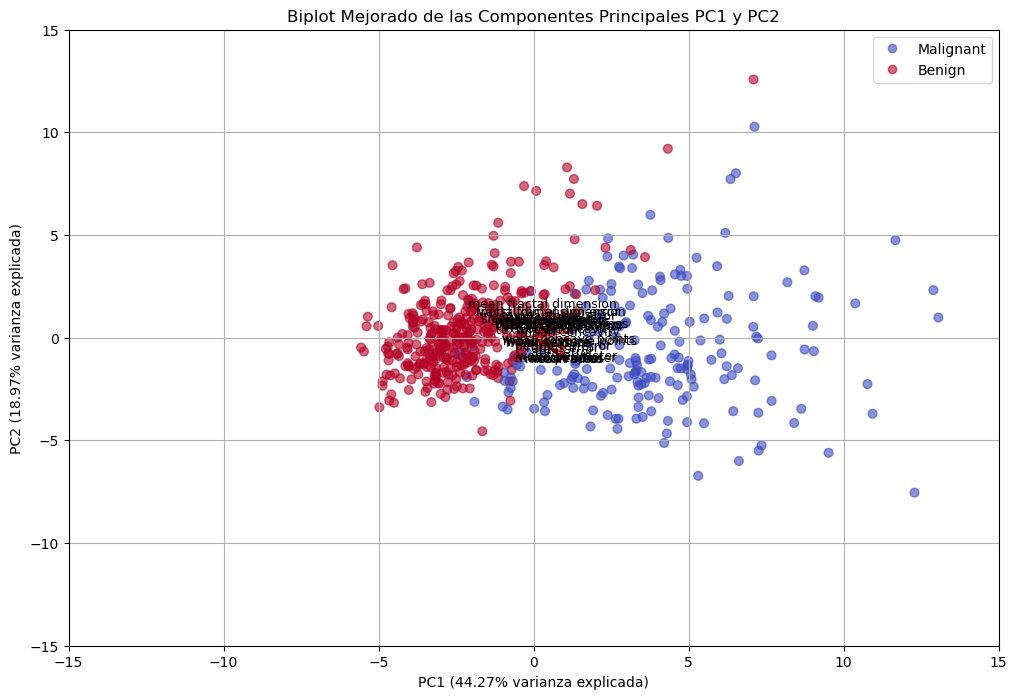

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

def improved_biplot(X_pca, pca, labels=None, scale_arrow=4, text_offset=4.5):
    # Graficar los puntos del PCA
    plt.figure(figsize=(12, 8))  # Aumentar tamaño del gráfico
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6, s=40)  # Tamaño de los puntos
    
    # Agregar leyenda y etiquetas de ejes
    plt.legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
    plt.title('Biplot Mejorado de las Componentes Principales PC1 y PC2')

    # Graficar las flechas de las variables originales con mayor escala
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0] * scale_arrow, v[1] * scale_arrow, color='r', alpha=0.7, head_width=0.15, linestyle='--')
        # Posicionar las etiquetas con un desplazamiento
        plt.text(v[0] * text_offset, v[1] * text_offset, X.columns[i], color='black', ha='center', va='center', fontsize=9)

    # Ajustar los límites del gráfico para mayor claridad
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.grid()
    plt.show()

# Llamar a la función biplot con las etiquetas originales (Diagnosis) y parámetros ajustados
improved_biplot(X_pca, pca, labels=y)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine


In [50]:
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = wine_data.target  # Clases de vino (0, 1, 2)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [49]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [51]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_std)

In [52]:
explained_variance_ratio = pca_full.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:")
print(explained_variance_ratio)

Proporción de varianza explicada por cada componente:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [53]:
explained_variance_cumulative = np.cumsum(explained_variance_ratio)
print("\nProporción de varianza explicada acumulada por los componentes:")
print(explained_variance_cumulative)


Proporción de varianza explicada acumulada por los componentes:
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


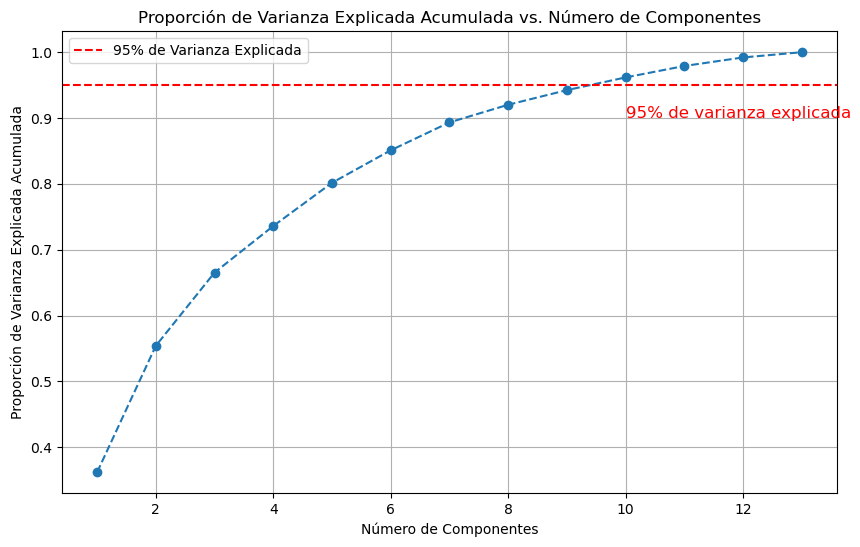

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Proporción de Varianza Explicada Acumulada vs. Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de Varianza Explicada')
plt.text(10, 0.90, '95% de varianza explicada', color='red', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [55]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_std)

In [56]:
print(f"\nProporción de varianza explicada con {7} componentes:")
print(pca.explained_variance_ratio_)
print(f"Varianza total explicada por {7} componentes: {pca.explained_variance_ratio_.sum():.2f}")


Proporción de varianza explicada con 7 componentes:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]
Varianza total explicada por 7 componentes: 0.89


In [58]:
pca_columns = [f'PC{i+1}' for i in range(7)]  # Crear nombres de columnas para cada componente principal
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df['Diagnosis'] = y  # Agregar la etiqueta original como referencia

In [59]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Diagnosis
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,2


     El biplot es un gráfico que permite representar las variables del dataset original y las observaciones transformadas en los ejes de los dos componentes principales. Las flechas representan las variables originales y es importante hacia dónde apuntan. La dirección y el sentido indican el peso y el signo de las variables originales en los dos componentes principales.

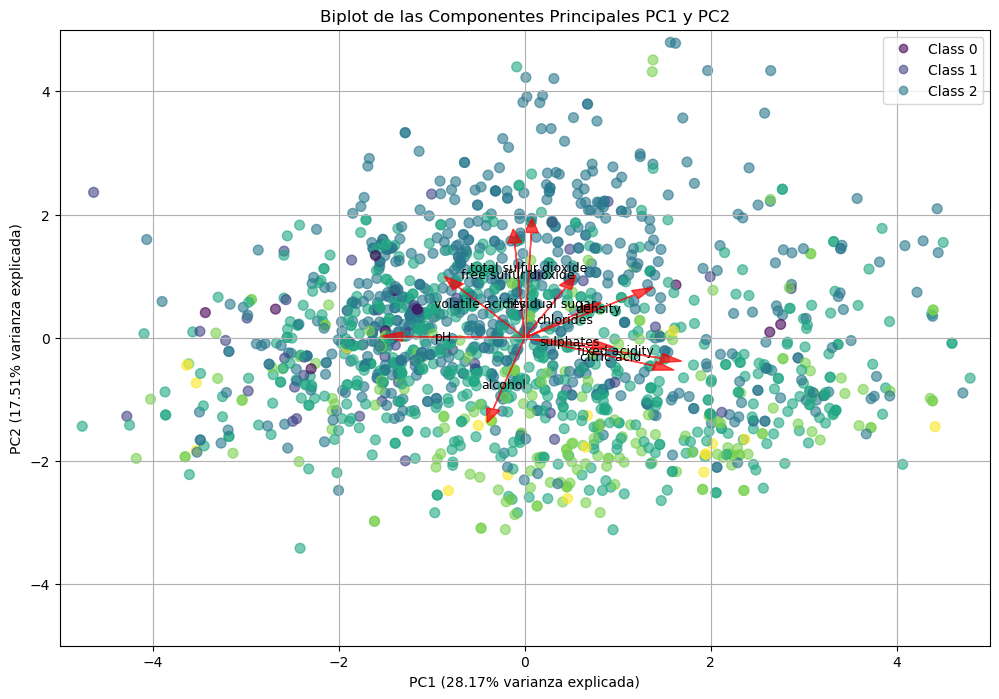

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

def biplot(X_pca, pca, labels=None, scale_arrow=3, text_offset=2):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
    
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
    plt.title('Biplot de las Componentes Principales PC1 y PC2')
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0] * scale_arrow, v[1] * scale_arrow, color='r', alpha=0.7, head_width=0.15)
        plt.text(v[0] * text_offset, v[1] * text_offset, X.columns[i], color='black', ha='center', va='center', fontsize=9)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()
biplot(X_pca, pca, labels=y)

A través de las flechas, podemos entender cómo las variables originales contribuyen a la separación de las muestras en el nuevo espacio reducido por PCA.
1. Dirección de la flecha:
- Muestra en qué dirección aumenta la variable.
- Si dos flechas apuntan en direcciones similares, esas variables están positivamente correlacionadas.
- Si las flechas son perpendiculares entre sí, las variables no están correlacionadas.
- Si las flechas apuntan en direcciones opuestas, las variables están negativamente correlacionadas.

2. Longitud de la flecha:

- Cuanto más larga es la flecha, mayor es la influencia de esa variable en la varianza explicada por las componentes principales. En otras palabras, indica qué tanto contribuye la variable a la separación de los puntos en el gráfico.
- Una flecha corta indica que la variable tiene menos importancia para explicar las diferencias entre las muestras.

Flavanoids tiene una flecha larga en la dirección de la componente PC1, lo que significa que es una variable que influye mucho en la separación de las muestras en ese eje. En otras palabras, las muestras que están más a la derecha en el eje PC1 probablemente tienen mayores valores de flavonoides.
Alcohol también apunta hacia la derecha, lo que significa que está correlacionado positivamente con flavanoids y con la separación en PC1.
Por otro lado, variables como malic acid y nonflavanoid_phenols están orientadas de manera opuesta a flavanoids, lo que indica una correlación negativa entre estas variables.

In [61]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality = pd.read_csv(url, sep=';')

In [62]:
X = wine_quality.drop('quality', axis=1)
y = wine_quality['quality']  # Calificación de calidad (0-10)

In [63]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

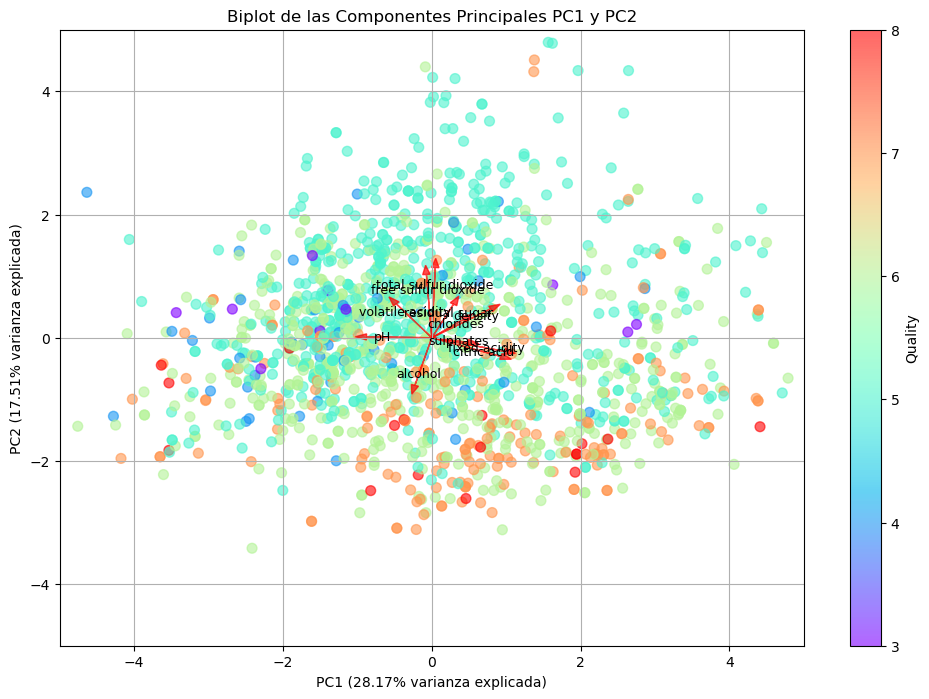

In [65]:
def biplot(X_pca, pca, labels=None, scale_arrow=2, text_offset=1.5):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.6, s=50)
    
    plt.colorbar(scatter, label='Quality')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
    plt.title('Biplot de las Componentes Principales PC1 y PC2')

    # Graficar las flechas de las variables originales
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0] * scale_arrow, v[1] * scale_arrow, color='r', alpha=0.7, head_width=0.1)
        plt.text(v[0] * text_offset, v[1] * text_offset, X.columns[i], color='black', ha='center', va='center', fontsize=9)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()

# Paso 5: Llamar a la función biplot con las etiquetas originales (Quality)
biplot(X_pca, pca, labels=y)

Alcohol tiene una flecha larga y apunta hacia el lado derecho de PC1, lo que sugiere que un mayor contenido de alcohol tiende a estar asociado con valores más altos en PC1, y podría estar relacionado con vinos de mejor calidad (puntos de colores cálidos como rojo y naranja).
Total sulfur dioxide y free sulfur dioxide apuntan en direcciones similares, lo que sugiere que están positivamente correlacionadas entre sí.
Volatile acidity y pH apuntan en direcciones opuestas a alcohol, lo que indica que podrían estar negativamente correlacionadas con el contenido de alcohol en los vinos.

In [68]:
import pandas as pd

# Load the uploaded dataset
file_path = '/home/jupyter-user5/Clase-2025-1/ResistanceCiprofloxacinStrict.tsv'

# Reading the file to check the content
data = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the data to understand its structure
data.head()


/opt/conda/envs/TDA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X = data.select_dtypes(include=[np.number]).dropna()  # Filtrar solo columnas numéricas y eliminar filas con NaN
y = data.loc[X.index, 'phenotype'] # Mantener el índice alineado y seleccionar la columna 'phenotype' como el objetivo

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
pca = PCA(n_components=2)  # Reducimos a los 2 primeros componentes para visualización
X_pca = pca.fit_transform(X_scaled)

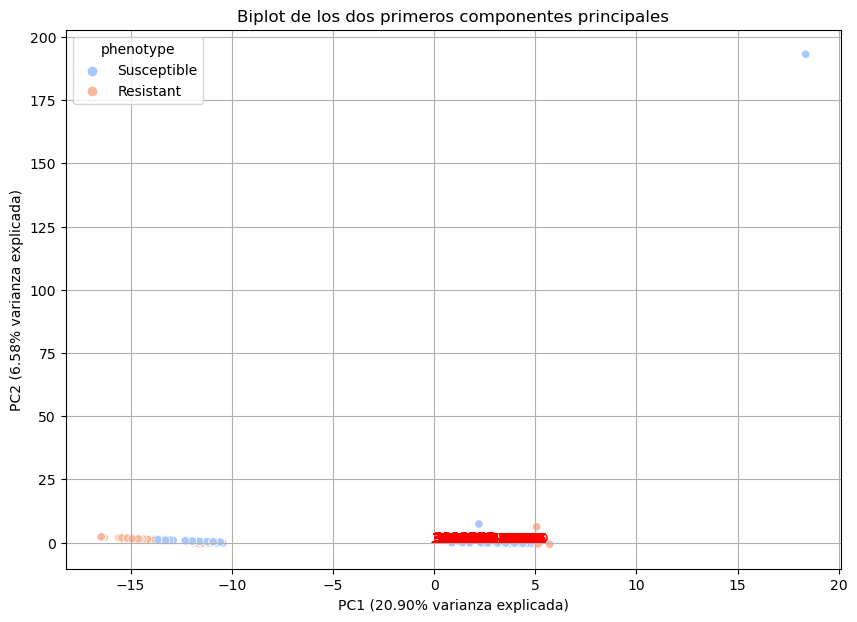

In [86]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm")
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5)
    plt.text(comp1 * 1.1, comp2 * 1.1, X.columns[i], color='r')
plt.title('Biplot de los dos primeros componentes principales')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
plt.grid()
plt.show()

Usando el conjunto de datos de Diabetes, realiza un Análisis de Componentes Principales (PCA)
- ¿Cuántos componentes son necesarios para explicar al menos el 90% de la varianza en el conjunto de datos?
- En el gráfico de dispersión, ¿observas alguna separación clara entre los diferentes niveles de progresión de la enfermedad (puntajes)? ¿Qué puedes inferir a partir de esto?
- ¿Qué variables parecen tener más influencia en los dos primeros componentes principales, según el biplot? ¿Qué interpretaciones puedes hacer sobre estas variables en relación con la progresión de la enfermedad?

Proporción de varianza explicada acumulada por los componentes:
[0.40242142 0.55165324 0.67224947 0.76779711 0.83401567 0.89428759
 0.94794364 0.99131196 0.99914395 1.        ]


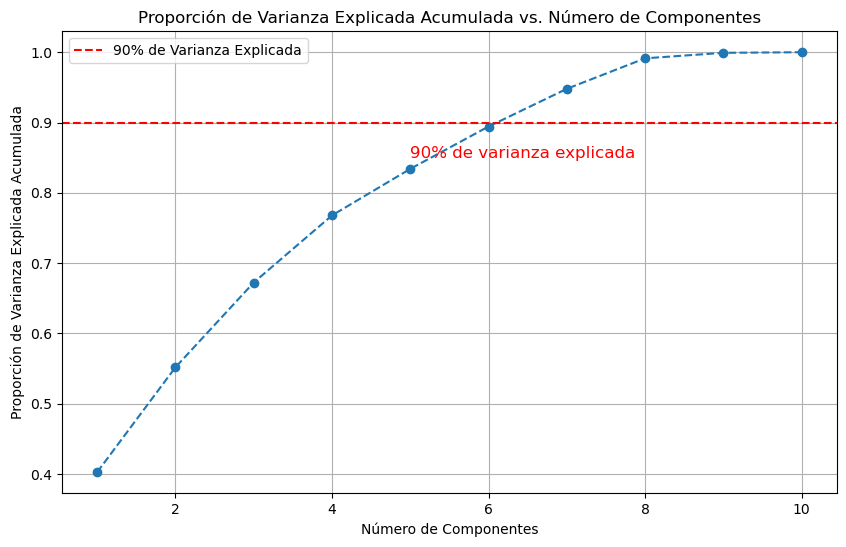

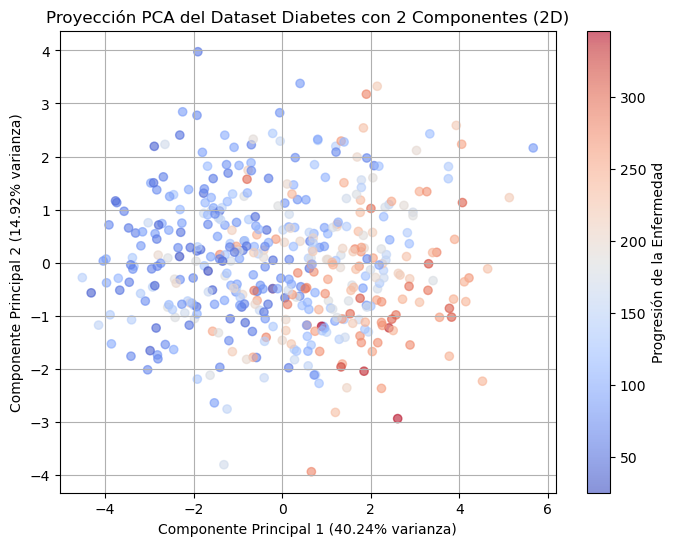

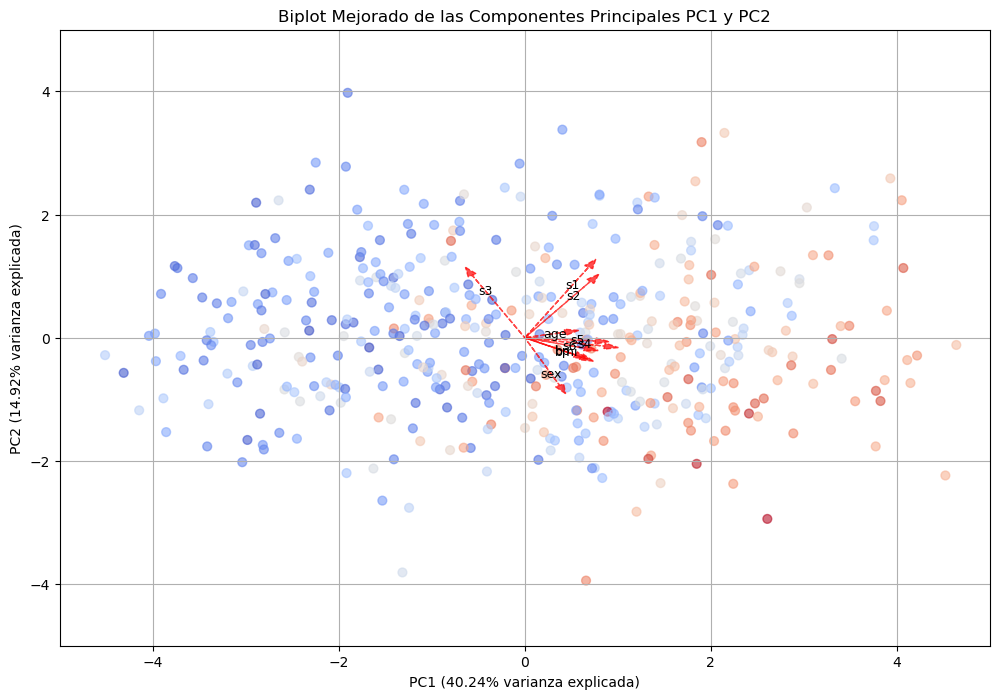

In [87]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Cargar los datos de diabetes
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_std)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Varianza explicada acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)
print("Proporción de varianza explicada acumulada por los componentes:")
print(explained_variance_cumulative)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Proporción de Varianza Explicada Acumulada vs. Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de Varianza Explicada')
plt.text(5, 0.85, '90% de varianza explicada', color='red', fontsize=12)
plt.grid()
plt.legend()
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('Proyección PCA del Dataset Diabetes con 2 Componentes (2D)')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% varianza)')
plt.colorbar(scatter, label='Progresión de la Enfermedad')
plt.grid()
plt.show()

def improved_biplot(X_pca, pca, labels=None, scale_arrow=2, text_offset=1.5):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6, s=40)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
    plt.title('Biplot Mejorado de las Componentes Principales PC1 y PC2')

    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0] * scale_arrow, v[1] * scale_arrow, color='r', alpha=0.7, head_width=0.1, linestyle='--')
        plt.text(v[0] * text_offset, v[1] * text_offset, X.columns[i], color='black', ha='center', va='center', fontsize=9)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()

# Llamar al biplot
improved_biplot(X_pca, pca, labels=y)


In [88]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
